In [109]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math


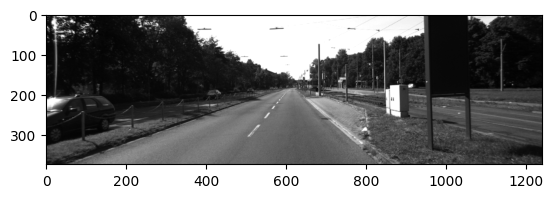

In [110]:
image = cv2.imread('../../IMAGES/DATASET_IMAGES/KITII/testing/um_000000.png', 0)
img = np.copy(image)
wid, hght = img.shape
plt.imshow(image,  cmap='gray')

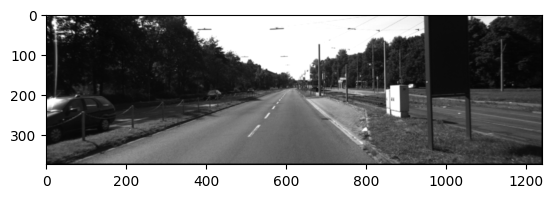

In [111]:
def suavizado(img):
    gauss = [
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ]

    # Dividir el kernel entre la suma (256)
    gauss2 = np.divide(gauss, 256)

    forma = np.shape(img)
    gaussiano2 = np.zeros(forma)

    # Suavizado gaussiano
    for x in list(range(1, forma[0]-1)):
        for y in list(range(1, forma[1]-1)):
            suma = 0
            for i in list(range(-1, 2)):
                for j in list(range(-1, 2)):
                    suma = img[x-i, y-j] * gauss2[i+1, j+1]+suma
            gaussiano2[x, y] = suma
    maxs = np.max(gaussiano2)
    gaussiano2 = gaussiano2*255/maxs
    gaussiano2 = gaussiano2.astype(np.uint8)
    return gaussiano2

# Crear kernel gaussiano
gaussian = suavizado(img)
plt.imshow(gaussian, cmap='gray')

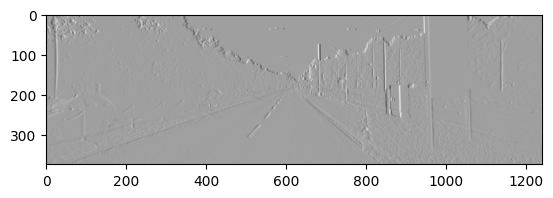

In [112]:
kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

def convolucion(img, kernel):

    forma = np.shape(img)
    base2 = np.zeros(forma)

    for x in list(range(1, forma[0]-1)):
        for y in list(range(1, forma[1]-1)):
            suma = 0
            for i in list(range(-1, 2)):
                for j in list(range(-1, 2)):
                    suma = img[x-i, y-j] * kernel[i+1, j+1]+suma
            base2[x, y] = suma
    #maxs = np.max(base2)
    #base2 = base2*255/maxs
    #base2 = base2.astype(np.uint8)
    return base2

sobel_x = convolucion(gaussian, kernel_sobel_x)
plt.imshow(sobel_x, cmap='gray')

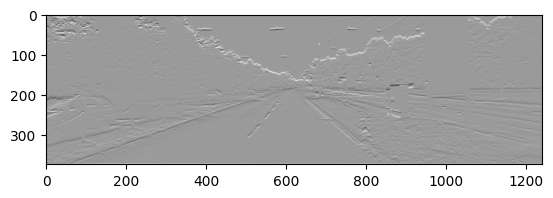

In [113]:
sobel_y = convolucion(gaussian, kernel_sobel_y)
plt.imshow(sobel_y, cmap='gray')

# Algoritmo de Canny

In [114]:
def canny(img, low_threshold, high_threshold):
    # Paso 1: Suavizado de la imagen
    image = gaussian

    # Paso 2: Cálculo de gradientes (Sobel)
    gradient_x = sobel_x
    gradient_y = sobel_y

    # Magnitud del gradiente y dirección
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

    # Paso 3: Supresión de no máximos
    gradient_magnitude_suppressed = np.copy(gradient_magnitude)

    for i in range(1, wid - 1):
        for j in range(1, hght - 1):
            angle = gradient_direction[i, j]
            mag = gradient_magnitude_suppressed[i, j]
            
            # Definir los índices de los píxeles vecinos
            i_n, j_n = i, j

            if (0 <= angle < 22.5) or (157.5 <= angle <= 180) or (-22.5 <= angle < 0) or (-180 <= angle < -157.5):
                j_n += 1
            elif (22.5 <= angle < 67.5) or (-157.5 <= angle < -112.5):
                i_n -= 1
                j_n += 1
            elif (67.5 <= angle < 112.5) or (-112.5 <= angle < -67.5):
                i_n -= 1
            elif (112.5 <= angle < 157.5) or (-67.5 <= angle < -22.5):
                i_n -= 1
                j_n -= 1

            # Comprobar si el píxel actual es un máximo local
            if mag < gradient_magnitude_suppressed[i_n:i_n+2, j_n:j_n+2].max():
                gradient_magnitude_suppressed[i, j] = 0

    # Umbralización (Hysteresis)
    edges = np.zeros((wid, hght))
    strong_edge_i, strong_edge_j = np.where(gradient_magnitude_suppressed > high_threshold)
    weak_edge_i, weak_edge_j = np.where((gradient_magnitude_suppressed >= low_threshold) & (gradient_magnitude_suppressed <= high_threshold))

    edges[strong_edge_i, strong_edge_j] = 255

    for idx in range(len(weak_edge_i)):
        i, j = weak_edge_i[idx], weak_edge_j[idx]
        if np.any(edges[i-1:i+2, j-1:j+2] == 255):
            edges[i, j] = 255

    return edges.astype(np.uint8)

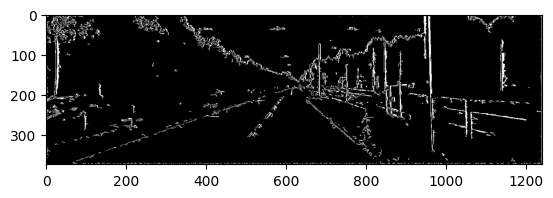

In [115]:
img_canny = canny(img, 5, 180)
plt.imshow(img_canny, cmap='gray')

# Algoritmo de Hough

# si

el valor máximo es: 174 y el mínimo es: 30


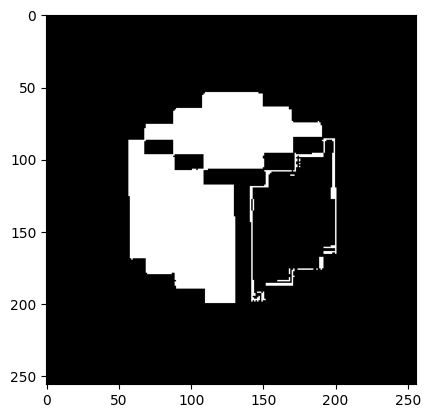

In [117]:
image2 = cv2.imread('../../IMAGES/chiquita.jpg', 0)

# Dice cual es el rango de valores
plana=[x for y in image2 for x in y]
print(f"el valor máximo es: {max(plana)} y el mínimo es: {min(plana)}")

# Modificando "rango" modificas el umbral
rango = -3
umbral = ((min(plana) + max(plana))/2) + rango
# print(umbral)

# Binarizacion
_, imgBin = cv2.threshold(image2, umbral, 255, cv2.THRESH_BINARY)

#Mostrar img bianria
plt.imshow(imgBin, cmap='gray')

shape test (8, 8)
[[255 255   0   0 255 255 255 255]
 [255   0   0   0   0 255 255 255]
 [  0 255 255 255   0   0 255 255]
 [  0   0 255   0 255   0 255 255]
 [  0 255 255 255 255 255   0   0]
 [  0 255 255   0 255 255   0   0]
 [  0 255   0   0   0 255   0   0]
 [255 255 255   0   0   0   0 255]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
alto 7
ancho 7
rango  range(0, 7)


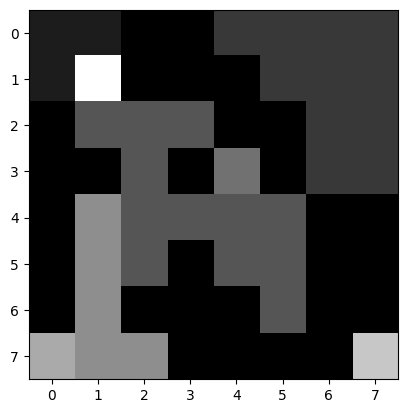

In [133]:
# Matriz de prueba parecida a la del ejercicio de clase
a = 255
b = 0
test = np.array([
        [a, a, b, b, a, a, a, a],
        [a, b, b, b, b, a, a, a],
        [b, a, a, a, b, b, a, a],
        [b, b, a, b, a, b, a, a],
        [b, a, a, a, a, a, b, b],
        [b, a, a, b, a, a, b, b],
        [b, a, b, b, b, a, b, b],
        [a, a, a, b, b, b, b, a]])

print("shape test",np.shape(test))
print(test)

forma2 = np.shape(test)
base2 = np.zeros(forma2)
base3 = np.zeros(forma2)

print(base3)
print(base2)

alto2, ancho2 = np.shape(test)
alto = alto2-1
ancho = ancho2-1

# Mostrar matriz
#plt.imshow(test, cmap='gray')

# Primer valor
grupo = 1

# Llenado de valores
for y2 in range(alto2):
    for x2 in range(ancho2):
        if test[y2,x2] == 255: # Si el valor en la matriz es 255 (blanco)
            
            if base2[y2,x2-1] != 0: # Si el valor a la izquierda es diferente de 0, toma ese valor
                base2[y2,x2] = base2[y2,x2-1]
            
            if base2[y2-1,x2] != 0: # Si el valor arriba es diferente de 0, toma ese valor
                base2[y2,x2] = base2[y2-1,x2]
            
            # Si los valores tanto arriba como a la izquierda son diferentes de 0, elige el menor
            if (base2[y2,x2-1] != 0) and (base2[y2-1,x2] != 0):
                
                if(base2[y2,x2-1] < base2[y2-1,x2]): # Si el valor a la izquierda es menor, toma ese valor
                    base2[y2,x2] = base2[y2,x2-1]
                
                else: # Caso opuesto (entonces el de arriba es menor)
                    base2[y2,x2] = base2[y2-1,x2]
            
            # Si el valor es 0 (y no tiene vecinos, porque primero se ve si tiene vecinos (codigo de arriba)) entonces asigna el valor de grupo nuevo
            if base2[y2,x2] == 0:
                base2[y2,x2] = grupo
                grupo = grupo+1
                
base2[1,1] = 9

#base2 = base2*30
# Imprimir resultado de matriz con sus grupos
#print(base2)
        
plt.imshow(base2, cmap='gray')

ancho 8
alto 8
alto2 range(0, 8)
[[3. 3. 0. 0. 3. 3. 3. 0.]
 [3. 3. 0. 0. 0. 3. 3. 0.]
 [0. 3. 3. 3. 0. 0. 3. 0.]
 [0. 0. 3. 0. 3. 0. 3. 0.]
 [0. 3. 3. 3. 3. 3. 0. 0.]
 [0. 3. 3. 0. 3. 3. 0. 0.]
 [0. 3. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


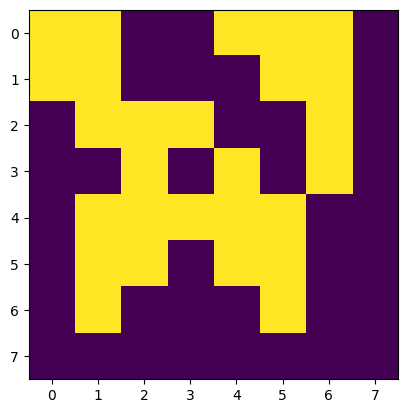

In [119]:
base3 = np.zeros(forma2)

print("ancho",ancho2)
print("alto",alto2)

print("alto2",range(alto2))

for y2 in range(ancho2-1):
    for x2 in range(alto2-1):
        
        lista = []
        
        if base2[y2,x2] != 0:
            
            base3[y2,x2] = 3
            
            """lista.append(base2[y2,x2])

            if(base2[y2-1,x2] != 0):
                lista.append(base2[y2-1,x2])
                
            if(base2[y2,x2+1] != 0):
                lista.append(base2[y2,x2+1])
                
            if(base2[y2+1,x2] != 0):
                lista.append(base2[y2+1,x2])
            
            if(base2[y2,x2-1] != 0):
                lista.append(base2[y2,x2-1])

            print("xy ", y2,x2,lista)
            
            
            
            print("min ",min(lista))"""
            
            #base3[y2,x2] = min(lista)
            

#print(base2)


#base3 = base3*30
print(base3)
plt.imshow(base3)